##  Problem Statement
It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits

Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

Dataset Description
This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

In [1]:
#Importing pandas & numpy libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing Data set
trainDF = pd.read_excel('train.xlsx')
trainDF=pd.DataFrame(trainDF)

## Data Cleaning:

## 1. Perform a preliminary data inspection and data cleaning.
## a. Check for missing data and formulate an apt strategy to treat them.


In [3]:
#Inspecting the first 5 records
trainDF.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [4]:
# It is possible to appretiate that Description and Customer Id are the only fields with null values
trainDF.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [5]:
#inspecting number of records in each column and data types
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [6]:
#"Description" field does not provide any additional information for the RFM model regarding a customer (recency, frequency, 
# or monetary value). This field wil be kept in order to be used for insights in week 3

#Customer ID as numerical value, cannot be filled using mean or median, so N/A values wll be discarded to proceed with further
#existing customer analysis
trainDF= trainDF.dropna()

In [7]:
#It is possible to see that shape was decreased
trainDF.shape

(285076, 8)

## b. Remove duplicate data records.

In [8]:
trainDF=trainDF.drop_duplicates()

## c. Perform descriptive analytics on the given data.

In [9]:
#describe funcion will be used to identify number of entries, and descriptive analytics regarding mean, 
#standard deviation, minimum, maximum values, and quartile identification
trainDF.describe()

,Quantity,UnitPrice,CustomerID
count,282420.000000,282420.000000,282420.000000
mean,12.110283,3.526323,15283.894880
std,297.109127,80.691250,1712.665383
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13952.000000
50%,5.000000,1.950000,15150.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


## Data Transformation:

## 2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

## a. Create month cohorts and analyze active customers for each cohort.

(cohort will be segregated based on customers who joined and stopped buying each month, analysis will be presented with retention rate per month in next step)

In [10]:
#Converting datatime column "InvoiceDate" to get year and month
trainDF['month value'] = trainDF['InvoiceDate'].dt.to_period('M')
#Sorting values using Invoice Date
trainDF= trainDF.sort_values(by=['InvoiceDate']).reset_index()

In [12]:
#Getting unique list of customers by first date where they appeared in the list and theirlast date

min_df=pd.DataFrame(trainDF.groupby("CustomerID", as_index=False)["month value"].min())
max_df=pd.DataFrame(trainDF.groupby("CustomerID", as_index=False)["month value"].max())
join_Dates = pd.merge(min_df, max_df, on='CustomerID')
join_Dates= join_Dates.rename(columns = {"month value_x": "Join Date", "month value_y": "Departure Date"}, inplace = False)
join_Dates.head()

,CustomerID,Join Date,Departure Date
0,12346.0,2011-01,2011-01
1,12347.0,2010-12,2011-12
2,12348.0,2010-12,2011-09
3,12349.0,2011-11,2011-11
4,12350.0,2011-02,2011-02


In [13]:
#Grouping customers analizing how many of them joined and left on a monthly basis
count_df=pd.DataFrame(trainDF.groupby("month value", as_index=False)["CustomerID"].count())
join_=join_Dates.groupby("Join Date", as_index=False)["CustomerID"].count().rename_axis(["index"])
departure_=join_Dates.groupby("Departure Date", as_index=False)["CustomerID"].count().rename_axis(["index"])
dates_ = pd.merge(join_, departure_, on="index")
dates_.head()

,Join Date,CustomerID_x,Departure Date,CustomerID_y
index,,,,
0,2010-12,929,2010-12,131
1,2011-01,422,2011-01,99
2,2011-02,377,2011-02,105
3,2011-03,441,2011-03,164
4,2011-04,298,2011-04,138


## b. Analyze the retention rate of customers.

## **Retention Rate**


To calculate retention rate, the following formula will be used:

**Retention Rate**= [ (Customers of the end of the month) - (Customers aquired during the period) ] / (Customers the start of the month) * 100

For example, we have the following info in order to analyze february:

_# of customers at the start =929(customers aquired in january)-131 (customers lost in january)= 798

_# of customers at the end of february=798(customers in january)+422(customers aquired in Feb)-99(customers lost in february)=1121

Retention Rate= (1121 - 422) / 798 *100
Retention Rate=87.59

In [14]:

dates_["Cummulative joins"]=dates_["CustomerID_x"].cumsum()
dates_["Cummulative departures"]=dates_["CustomerID_y"].cumsum()
dates_["At the start"]=(dates_["Cummulative joins"]-dates_["Cummulative departures"]).shift(1)
dates_["At the end"]=(dates_["Cummulative joins"]-dates_["Cummulative departures"])
dates_["Retention Rate"]=((dates_["At the end"] - dates_["CustomerID_x"])/dates_["At the start"]*100).round(2)
dates_= dates_.rename(columns = {"CustomerID_x": "# of Acquired customers", "CustomerID_y": "# of lost customers"}, inplace = False)

In [15]:
dates_

,Join Date,# of Acquired customers,Departure Date,# of lost customers,Cummulative joins,Cummulative departures,At the start,At the end,Retention Rate
index,,,,,,,,,
0,2010-12,929,2010-12,131,929,131,NaN,798,NaN
1,2011-01,422,2011-01,99,1351,230,798.0,1121,87.59
2,2011-02,377,2011-02,105,1728,335,1121.0,1393,90.63
3,2011-03,441,2011-03,164,2169,499,1393.0,1670,88.23
4,2011-04,298,2011-04,138,2467,637,1670.0,1830,91.74
5,2011-05,278,2011-05,164,2745,801,1830.0,1944,91.04
6,2011-06,238,2011-06,180,2983,981,1944.0,2002,90.74
7,2011-07,192,2011-07,186,3175,1167,2002.0,2008,90.71
8,2011-08,166,2011-08,214,3341,1381,2008.0,1960,89.34


In [16]:
#Row 12 will be discarded because it requires the following month in order to analize it. 
#people whose last purchase was on december 2011 are not lost customers.
dates_.drop([12], axis=0, inplace=True)

In [17]:
#Converting month value 1-12 to Month name, in order to be easy to understad for the client
def get_month_value (value):
     return str(value.year) + " - " + str(datetime.datetime.strptime(str(value.month), "%m").strftime("%B"))
dates_["Month Name"]=dates_["Join Date"].apply(get_month_value)

Text(0.5, 0, 'Retention rate value')

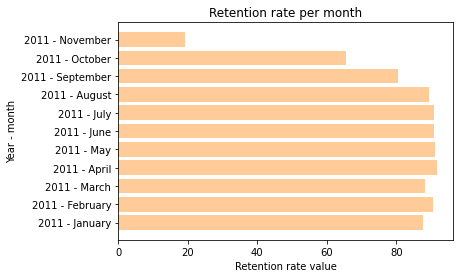

In [18]:
plt.barh(dates_["Month Name"], dates_["Retention Rate"], color='#FFCC99')
plt.title("Retention rate per month")
plt.ylabel("Year - month")
plt.xlabel("Retention rate value")

## Project Task: Week 2
Data Modeling :

1. Build a RFM (Recency Frequency Monetary) model. 

- Recency means the number of days since a customer made the last purchase. 
- Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. 
- Monetary is the total amount of money a customer spent in that given period. 

Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

In [19]:
#calculating amount field
trainDF["Amount"]=trainDF["Quantity"]*trainDF["UnitPrice"]

In [20]:
#Veryfing max invoice date
trainDF["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [21]:
#RFM Model: recency = number of days after the customer´s last registered purchase
#frequency - how many times the customer bought during the year
#Monetary= total amount a customer bought in the year
RFM_Model= pd.DataFrame(trainDF.groupby("CustomerID", as_index=False).agg({
        "InvoiceDate": lambda d:(pd.to_datetime("2011-12-10") - d.max() ).days,
        "InvoiceNo": "count",
        "Amount": "sum"}))
RFM_Model= RFM_Model.rename(columns = {"InvoiceNo": "Frequency", "InvoiceDate": "Recency", "Amount":"Monetary"}, inplace = False)

In [22]:
RFM_Model.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,2,132,3124.96
2,12348.0,75,20,1009.88
3,12349.0,18,50,1344.17
4,12350.0,310,11,213.30


## 3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

    0-25% will be classified as very low- [1]

    25%-50% will be classified as low [2]

    50% - 75% will be classified as high [3]

    75% and above will be classified as very high [4]

In [23]:
RFM_Model["RS"]=pd.qcut(RFM_Model["Recency"],4,[4,3,2,1])
RFM_Model["FS"]=pd.qcut(RFM_Model["Frequency"],4,[1,2,3,4])
RFM_Model["MS"]=pd.qcut(RFM_Model["Monetary"],4,[1,2,3,4])

## b1. Combine three ratings to get a RFM segment (as strings).


In [24]:
RFM_Model["Segment"]=RFM_Model["RS"].astype(str)+RFM_Model["FS"].astype(str)+RFM_Model["MS"].astype(str)

## b2. Get the RFM score by adding up the three ratings.



In [25]:
RFM_Model["RFM Score"]=RFM_Model["FS"].astype(int)+RFM_Model["RS"].astype(int)+RFM_Model["MS"].astype(int)

In [26]:
RFM_Model.head()

,CustomerID,Recency,Frequency,Monetary,RS,FS,MS,Segment,RFM Score
0,12346.0,325,2,0.00,1,1,1,111,3
1,12347.0,2,132,3124.96,4,4,4,444,12
2,12348.0,75,20,1009.88,2,2,3,223,7
3,12349.0,18,50,1344.17,3,3,4,334,10
4,12350.0,310,11,213.30,1,1,2,112,4


## b3. Analyze the RFM segments by summarizing them and comment on the findings.



In [27]:
RFM_Model["Class"]=pd.qcut(RFM_Model["RFM Score"],4,["Minor Customer","Average Customer","Good Customer","Best Customer"])
RFM_Model["Class"]=RFM_Model["Class"].astype(str)
RFM_Model["RS"]=RFM_Model["RS"].astype(str)

In [28]:
#creating a sublass to analyze recency
def check_recency(RS_score, Class):
    if (RS_score=="2"):
        return "Almost Lost "
    elif RS_score=="1":
        return "Lost "
    else:
        return "Recent"
    
RFM_Model["Sub Class"]=RFM_Model["RS"].apply(check_recency, Class=RFM_Model["Class"].astype(str)[0])


In [29]:
RFM_Model.head()

,CustomerID,Recency,Frequency,Monetary,RS,FS,MS,Segment,RFM Score,Class,Sub Class
0,12346.0,325,2,0.00,1,1,1,111,3,Minor Customer,Lost
1,12347.0,2,132,3124.96,4,4,4,444,12,Best Customer,Recent
2,12348.0,75,20,1009.88,2,2,3,223,7,Average Customer,Almost Lost
3,12349.0,18,50,1344.17,3,3,4,334,10,Good Customer,Recent
4,12350.0,310,11,213.30,1,1,2,112,4,Minor Customer,Lost


In [30]:
graph=RFM_Model.groupby("Class", as_index=False).count()
graph2=RFM_Model.groupby("Sub Class", as_index=False).count()

**Customer Segments**

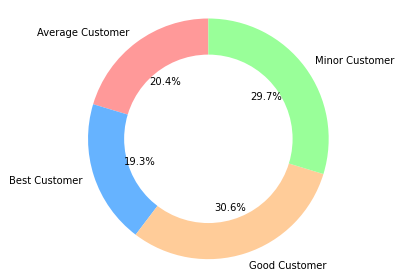

In [31]:
#Inspecting the distribution

# Pie chart
labels = graph["Class"]
sizes = graph["CustomerID"]

#colors
colors = ['#ff9999','#66b3ff','#ffcc99','#99ff99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()


**Best Customers**

(note: scores are segregated in the following order: Recency, Frequency, Monetary. The best score given was 4, and 1 is the lowest one. RFM Score is the sum of all 3 values).

It is possible to appretiate that customers with a RFM Score of 11 or 12 are considered the company´s Best Customers. It is achieved by having the maximum score in all 3 features, or at least, only one score of 3

It is concluded that it is reasonable to classify these scenarios as the best customers of the companysince this represents the maximum RFM score (customers who bought recently, many times per year, with in a high amount). The following codes show all scenarios considered in this category:

In [32]:
#Printing all values
np.transpose(pd.DataFrame(RFM_Model[RFM_Model.Class =="Best Customer"]["Segment"].unique()))

,0,1,2,3
0,444,344,434,443


In [33]:
#Printing min and max score posible to achieve this category
print( "min value: ", RFM_Model[RFM_Model.Class=="Best Customer"]["RFM Score"].min(),
     ", max value: ", RFM_Model[RFM_Model.Class=="Best Customer"]["RFM Score"].max())


min value:  11 , max value:  12


**Good Customers**

A good customer achieved a RFM score between 8 and 10. These customers are characterized by a score of 3 or 4 in any of the Recency, frequency or monetary categories, and values of 2 and 3 might also be present with the following scenarios:

Y stands for a value of 1 or 2 and X for a value of 3 or 4;

XX Y - a customer who has bought recently and frequently, but not in high amounts.

X Y X - a customer who does not buy frequently, but has bought recently with a high amount.

Y XX - acustomer who has not bought something recently, but with a high frequency and amount in the past

It is concluded that it is reasonable to classify these scenarios as good customers for the company. Regardles of frequency and amount, if a customer has a low recency amount, it could be a lost or almost lost customer. This is analyzed in the next section. The following code shows all scenarios considered in this category:

In [34]:
np.transpose(pd.DataFrame(RFM_Model[RFM_Model.Class =="Good Customer"]["Segment"].unique()))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,334,244,433,233,323,134,332,234,423,224,...,432,242,414,324,243,442,314,413,431,143


In [35]:
print( "min value: ", RFM_Model[RFM_Model.Class=="Good Customer"]["RFM Score"].min(),
     ", max value: ", RFM_Model[RFM_Model.Class=="Good Customer"]["RFM Score"].max())


min value:  8 , max value:  10


**Average Customers**

These customers are classified by a RFM Score between 6 and 7. This can be achieved by multiple combinations, like a high score (3 or 4), followed by two lower scores, either a 2 or a 1, three low scores of 222, or a "123" sequence

This category represents a segment of customers who actively purchased goods from the company, but not many times or in high amouns througout the year. A customer who recenlty joined the company is also considered in this category by having a good recency, but not many invoices (frequency) or a high amount due to time constraints

In [36]:
np.transpose(pd.DataFrame(RFM_Model[RFM_Model.Class =="Average Customer"]["Segment"].unique()))

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,223,133,412,222,123,411,322,312,421,213,...,241,124,214,331,231,321,132,114,232,142


In [37]:
print( "min value: ", RFM_Model[RFM_Model.Class=="Average Customer"]["RFM Score"].min(),
     ", max value: ", RFM_Model[RFM_Model.Class=="Average Customer"]["RFM Score"].max())

min value:  6 , max value:  7


**Minor Customer**

A minor customer has bought in a small frequency and amount. Its RFM score is between 3 and 5

When a high score of 3 is present, it must be followed by a "1" in subsequent categories to achieve a sum of 5. This means it has either a good Frequency, Recency or Monetary value followed by a two of the lowest possible scores in the remaining categories, or scores consisting entirely of 2 and 1.

It is reasonable to classify these scenarios as minor customers for the company, since they are not characterized by a high recency, frequency or monetary value

In [38]:
np.transpose(pd.DataFrame(RFM_Model[RFM_Model.Class =="Minor Customer"]["Segment"].unique()))

,0,1,2,3,4,5,6,7,8,9
0,111,112,122,212,311,221,121,211,131,113


In [39]:
print( "min value: ", RFM_Model[RFM_Model.Class=="Minor Customer"]["RFM Score"].min(),
     ", max value: ", RFM_Model[RFM_Model.Class=="Minor Customer"]["RFM Score"].max())

min value:  3 , max value:  5


**Customer subclass based on recency**

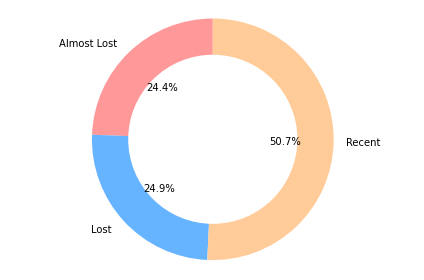

In [40]:

labels = graph2["Sub Class"]
sizes = graph2["CustomerID"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()

plt.show()

**Lost Customers**

It is possible to appretiate that regardless of the customer category: Average, Good, or Minor, if recency has a value of 1, which means its lower possible score, it represents a customer that the company might have lost.

The company should focus in finding a way to bring this customer back using customized emails, or marketing to promote the company and win the customer back


**Almost Lost Customers**


It is possible to appretiate that regardless of the customer category: Average, Good, or Minor, if recency has a value of 2, it represents a customer who could almost be lost.

The company should focus in this customer segment to encourage them to keep acquiring products through loyalty programs or points that could be used as a discount in the future.

**Recent Customers**

A customer who has bought recently for the company represents the best case scenario. He needs to be encouraged to keep aquiring more goods by notifying them when discounts are available or recognizing this achievement for good and best customers
with a customized badge, or loyalty reward programs.

## Project Task: Week 3:

Create clusters using k-means clustering algorithm.

Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

In [41]:
#Imposting Library for K means
from sklearn.cluster import KMeans
#Importing library for label encoder
from sklearn import preprocessing


In [42]:
#Preparing data for Kmeans

KmeansModel=RFM_Model[["RS","FS","MS","RFM Score"]]

KmeansModel.head()

,RS,FS,MS,RFM Score
0,1,1,1,3
1,4,4,4,12
2,2,2,3,7
3,3,3,4,10
4,1,1,2,4


In [43]:
#A value of 5 will be haphazardly selected to test its value

kmeans=KMeans(n_clusters=5)
kmeans.fit(KmeansModel)

KMeans(n_clusters=5)

In [44]:
KmeansModel["Cluster"]=kmeans.predict(KmeansModel)

In [45]:
#the following code shows the data distribution among the 5 centroids
unique, counts= np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 841, 1: 956, 2: 931, 3: 790, 4: 835}


**Decide the optimum number of clusters to be formed.**

In [46]:
#inetria will be calculated to inspect the opimal number of clusters
wcss = []
for i in range(1,11) :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(KmeansModel)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Curve')

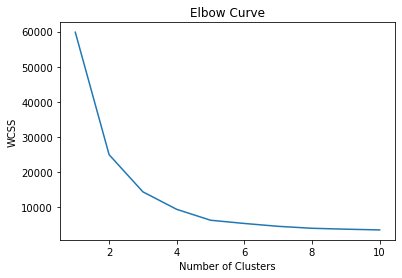

In [47]:
## Plotting the ELbow Curve
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')


**It is concluded that the optimal number of clusters according to elbow curve is 3**

In [48]:
#calculating k means algorithm with 3 clusters
kmeans=KMeans(n_clusters=3)
kmeans.fit(KmeansModel)
KmeansModel["Cluster"]=kmeans.predict(KmeansModel)

**Analyze these clusters and comment on the results.**

According to K means clustering algorithm, costumers can be segmented into 3 categories:
- cluster 0 has a RFM score of 11 or 12 representing the company´s best costumers. There are 841 cases
- cluster 2 represents a RFM score between 10 and 7, and corresponds to the company´s good costumers with 1766 cases
- cluster 1 has a RFM score between 3 and 6, and it represents the company´s minor costumers with 1746 cases found


Text(0.5, 1.0, 'Cluster segmentation based on Recency')

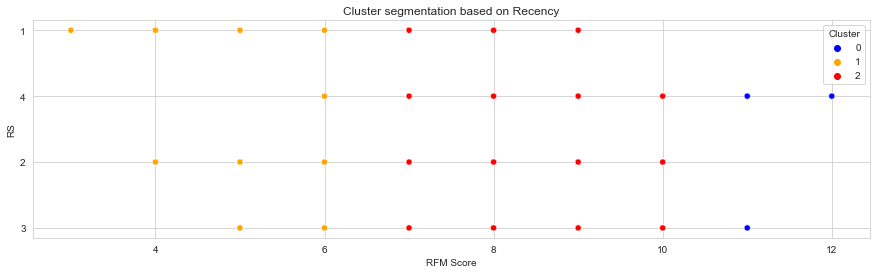

In [49]:
plt.rcParams['figure.figsize'] = [15, 4]
sns.set_style("whitegrid")
sns.scatterplot('RFM Score',"RS",data=KmeansModel,hue = 'Cluster', palette=['blue','orange','red'])
plt.title('Cluster segmentation based on Recency')


Text(0.5, 1.0, 'Cluster segmentation based on Frequency')

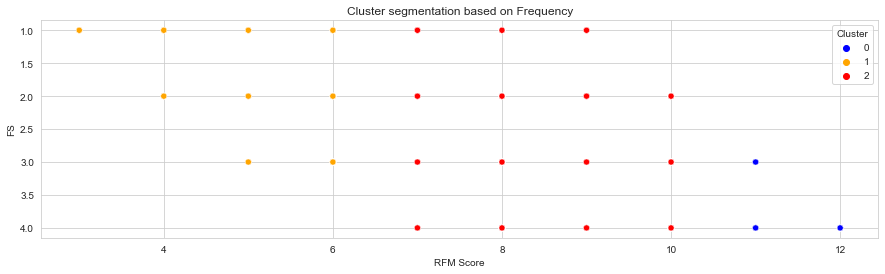

In [50]:
sns.scatterplot('RFM Score',"FS",data=KmeansModel,hue = 'Cluster', palette=['blue','orange','red'])
plt.title('Cluster segmentation based on Frequency')

Text(0.5, 1.0, 'Cluster segmentation based on Monetary Value')

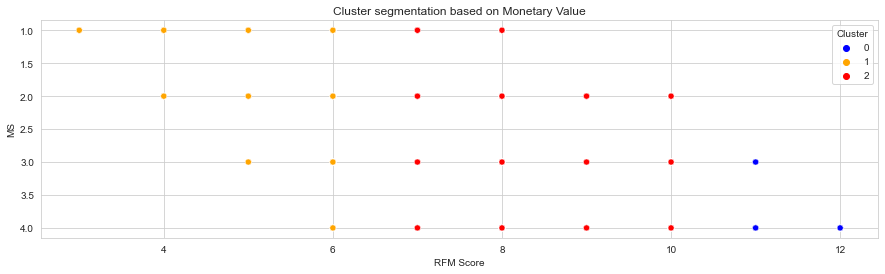

In [51]:
sns.scatterplot('RFM Score',"MS",data=KmeansModel,hue = 'Cluster', palette=['blue','orange','red'])
plt.title('Cluster segmentation based on Monetary Value')

Text(0.5, 1.0, 'Cluster segmentation based on RFM Score')

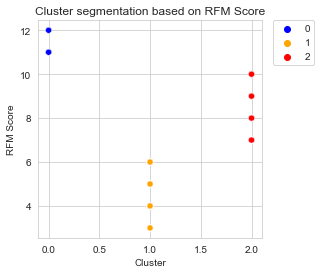

In [52]:
#This last graph shows cluster number versus RFM score for each. cluster 1 is at the bottom and cluster 0 represents the max score

plt.rcParams['figure.figsize'] = [4, 4]


sns.scatterplot("Cluster", "RFM Score",data=KmeansModel,hue = 'Cluster', palette=['blue','orange','red'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Cluster segmentation based on RFM Score')



In [53]:
# inspecting number of customers in each cluster
unique, counts= np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 841, 1: 1746, 2: 1766}


## Project Task: Week 4


**in order to create a tableau visualization, an xslx file will be created using updated train DF, RFM Model, and K means´ Elbow curve dataframe. Link:https://public.tableau.com/views/Retail-PGP/Dashboard1?:language=de-DE&publish=yes&:display_count=n&:origin=viz_share_link  **


Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

Bar graph to show the count of orders vs. hours throughout the day

Plot the distribution of RFM values using histogram and frequency charts

Plot error (cost) vs. number of clusters selected

Visualize to compare the RFM values of the clusters using heatmap

In [64]:
trainDF.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month value,Amount
0,99201,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
1,163173,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
2,81407,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
3,86726,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
4,267050,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,15.30


In [65]:
RFM_Model["Cluster"]=KmeansModel["Cluster"]
RFM_Model.head()

,CustomerID,Recency,Frequency,Monetary,RS,FS,MS,Segment,RFM Score,Class,Sub Class,Cluster
0,12346.0,325,2,0.00,1,1,1,111,3,Minor Customer,Lost,1
1,12347.0,2,132,3124.96,4,4,4,444,12,Best Customer,Recent,0
2,12348.0,75,20,1009.88,2,2,3,223,7,Average Customer,Almost Lost,2
3,12349.0,18,50,1344.17,3,3,4,334,10,Good Customer,Recent,2
4,12350.0,310,11,213.30,1,1,2,112,4,Minor Customer,Lost,1


In [66]:
wcss=pd.DataFrame(wcss)
wcss

,0
0,59824.394670
1,24904.811002
2,14307.732435
3,9318.861929
4,6216.297708
5,5295.987194
6,4481.189753
7,3920.606831
8,3665.157424
9,3456.059998


In [67]:
KmeansModel.head()

,RS,FS,MS,RFM Score,Cluster
0,1,1,1,3,1
1,4,4,4,12,0
2,2,2,3,7,2
3,3,3,4,10,2
4,1,1,2,4,1


In [68]:
with pd.ExcelWriter('output v2.xlsx') as writer:  
    trainDF.to_excel(writer, sheet_name='Retail Data')
    RFM_Model.to_excel(writer, sheet_name='RFM Model')
    wcss.to_excel(writer, sheet_name='Elbow Curve Kmeans')